In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os

### CIFAR10 Dataset 생성 
* tf.keras.datasets의 cifar10.load_data()는 웹에서 Local computer로 Download후 train과 test용 image와 label array로 로딩. 

In [2]:
from tensorflow.keras.datasets import cifar10

# 전체 6만개 데이터 중, 5만개는 학습 데이터용, 1만개는 테스트 데이터용으로 분리
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
print("train dataset shape:", train_images.shape, train_labels.shape)
print("test dataset shape:", test_images.shape, test_labels.shape)

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

170498071/170498071 [==============================] - 12s 0us/step
train dataset shape: (50000, 32, 32, 3) (50000, 1)
test dataset shape: (10000, 32, 32, 3) (10000, 1)


In [3]:
train_images[0, :, :, :], train_labels[0, :]

(array([[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],
 
        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],
 
        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],
 
        ...,
 
        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],
 
        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],
 
        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
  

In [4]:
NAMES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])
print(train_labels[:10])

[[6]
 [9]
 [9]
 [4]
 [1]
 [1]
 [2]
 [7]
 [8]
 [3]]


### CIFAR10 데이터 시각화
* 이미지 크기는 32x32이며 RGB채널. 
* 전반적으로 Label에 해당하는 대상이 이미지의 중앙에 있고, Label 대상 오브젝트 위주로 이미지가 구성. 

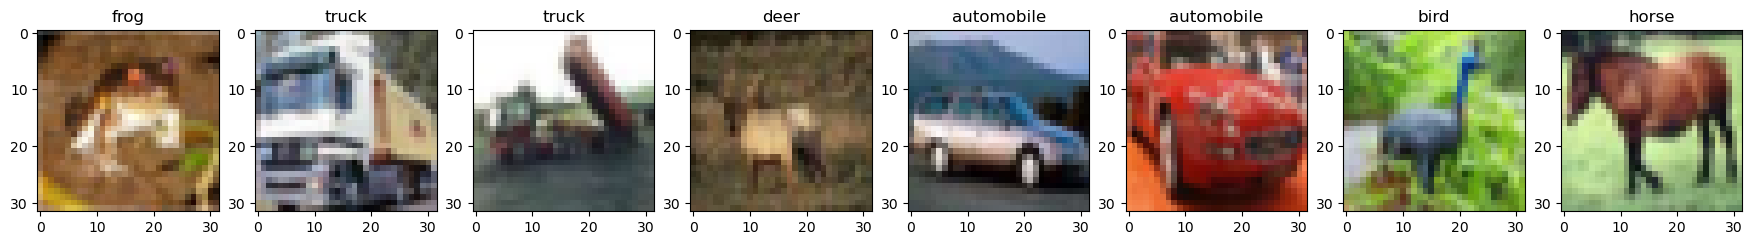

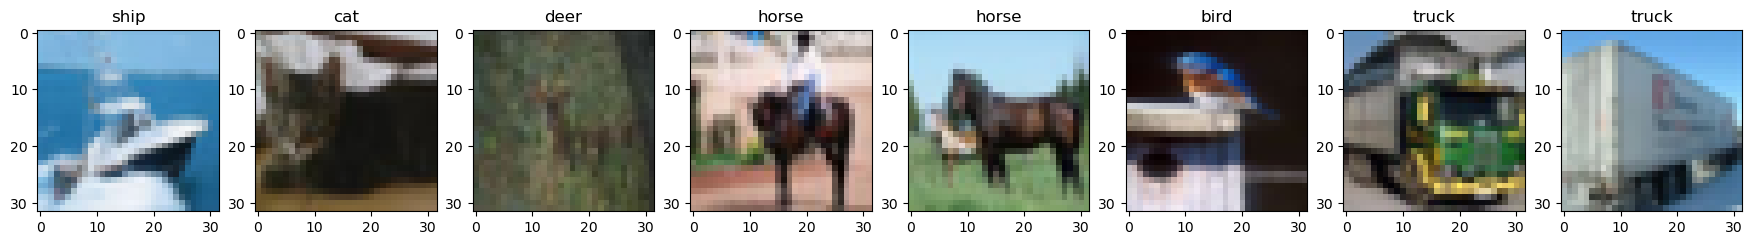

In [5]:
import matplotlib.pyplot as plt
import cv2
%matplotlib inline 

def show_images(images, labels, ncols=8):
    figure, axs = plt.subplots(figsize=(22, 6), nrows=1, ncols=ncols)
    for i in range(ncols):
        axs[i].imshow(images[i])
        label = labels[i].squeeze()#아까 들어온 train_label이 2차원 값인데 squeeze로 1차원으로 만들었다.
        axs[i].set_title(NAMES[int(label)])
        
show_images(train_images[:8], train_labels[:8], ncols=8)
show_images(train_images[8:16], train_labels[8:16], ncols=8)

### Data preprocessing
* image array의 0 ~ 255 사이의 값으로 되어 있는 pixel intensity 값을 0 ~ 1 사이 값으로 변환. 정수값 pixel 값을 255.0 으로 나눔. 
* label array는 숫자형 값으로 바꾸되, 원-핫 인코딩을 적용할지 선택. 일반적으로 원-핫 인코딩을 적용하는게 Keras Framework활용이 용이
* image array, label array 모두 float32 형으로 변환. numpy 의 float32는 tensor 변환시 tf.float32 로 변환되며 기본적으로 Tensorflow backend Keras는 tf.float32를 기반으로 함. 


In [6]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# label은 원-핫 인코딩이 Keras에서는 활용이 용이하나, 여기서는 sparse categorical crossentropy 테스트를 위해 적용하지 않음. 
def get_preprocessed_data(images, labels):
    
    # 학습과 테스트 이미지 array를 0~1 사이값으로 scale 및 float32 형 변형. 
    images = np.array(images/255.0, dtype=np.float32)
    labels = np.array(labels, dtype=np.float32)
    
    return images, labels

train_images, train_labels = get_preprocessed_data(train_images, train_labels)
test_images, test_labels = get_preprocessed_data(test_images, test_labels)

In [7]:
train_images[0, :, :, :]

array([[[0.23137255, 0.24313726, 0.24705882],
        [0.16862746, 0.18039216, 0.1764706 ],
        [0.19607843, 0.1882353 , 0.16862746],
        ...,
        [0.61960787, 0.5176471 , 0.42352942],
        [0.59607846, 0.49019608, 0.4       ],
        [0.5803922 , 0.4862745 , 0.40392157]],

       [[0.0627451 , 0.07843138, 0.07843138],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509805, 0.21568628],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117648, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215687, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941177, 0.19607843],
        [0.47058824, 0.32941177, 0.19607843],
        [0.42745098, 0.28627452, 0.16470589]],

       ...,

       [[0.8156863 , 0.6666667 , 0.3764706 ],
        [0.7882353 , 0.6       , 0.13333334],
        [0.7764706 , 0

In [8]:
# Keras는 CNN(정확히는 CNN 2D) 모델에 학습 데이터를 입력할 시 반드시 Image array는 4차원 배열이 되어야 함. 
# RGB 채널 이미지 array는 기본적으로 3차원임. 여기에 이미지의 갯수를 포함하므로 4차원이 됨.  
# 만일 Grayscale인 2차원 이미지 array라도 의도적으로 채널을 명시해서 3차원으로 만들어 주고, 여기에 이미지 개수를 포함해서 4차원이 됨. 

print(train_images.shape, train_labels.shape)

(50000, 32, 32, 3) (50000, 1)


In [10]:
# label 데이터가 2차원임. 이를 Keras 모델에 입력해도 별 문제없이 동작하지만, label의 경우는 OHE적용이 안되었는지를 알 수 있게 명확하게 1차원으로 표현해 주는것이 좋음. 
# 2차원인 labels 데이터를 1차원으로 변경. 
train_labels = train_labels.squeeze()
test_labels = test_labels.squeeze()

### Custom Model 생성
* CNN Model의 맨처음 Layer는 Input layer. Input layer의 shape를 이미지 사이즈와 RGB 3채널에 맞게 (32, 32, 3) 으로 설정.
* Conv 연산을 연달아 적용하고 MaxPooling을 적용하는 루틴으로 모델 생성. MaxPooling을 적용 후에는 필터 갯수를 더욱 증가 시킴. 
* MaxPooling 적용 후에 출력 피처맵의 사이즈는 작아지되, 채널(깊이)는 늘어나는 형태로 모델 생성. 
* CIFAR10의 Label수가 10개이므로 Classification을 위한 맨 마지막 Dense layer의 units 갯수는 10개임
* label값이 원-핫 인코딩 되지 않았기 때문에 model.compile()에서 loss는 반드시 sparse_categorical_crossentropy여야함. 
* 만일 label값이 원-핫 인코딩 되었다면 loss는 categorical_crossentropy 임. 

In [1]:
IMAGE_SIZE = 32

In [25]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam , RMSprop 
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau , EarlyStopping , ModelCheckpoint , LearningRateScheduler

input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

#x = Conv2D(filters=32, kernel_size=(5, 5), padding='valid', activation='relu')(input_tensor)
x = Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu')(input_tensor)
x = Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(filters = 64,kernel_size = (3,3), padding = 'same', activation = 'relu')(x)
x = Conv2D(filters = 64, kernel_size = (3,3), padding = 'same')(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size = 2)(x)

x = Conv2D(filters = 128, kernel_size = (3,3),padding = 'same',activation = 'relu')(x)
x = Conv2D(filters = 128, kernel_size = (3,3),padding = 'same',activation = 'relu')(x)
x = MaxPooling2D(pool_size = 2)(x)


# cifar10의 클래스가 10개 이므로 마지막 classification의 Dense layer units갯수는 10
x = Flatten(name='flatten')(x)
x = Dropout(rate=0.5)(x)
x = Dense(300, activation='relu', name='fc1')(x)
x = Dropout(rate=0.3)(x)
output = Dense(10, activation='softmax', name='output')(x)

model = Model(inputs = input_tensor, outputs = output)
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_13 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_15 (Conv2D)          (None, 16, 16, 64)        36928     
                                                           

In [26]:
# optimizer는 Adam으로 설정하고, label값이 원-핫 인코딩이 아니므로 loss는 sparse_categorical_crossentropy 임. 
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### Model 학습 수행 및 테스트 데이터로 평가 
* Model의 fit() 메소드를 호출하여 학습
* fit()은 학습 데이터가 Numpy array 자체로 들어올때, Generator 형태로 들어올때 약간의 수행로직 차이가 있음. 
* 인자로 x에는 학습 image data, y는 학습 label 데이터. 
* batch_size는 한번에 가져올 image/label array 갯수. 1개씩 가져오면 수행속도가 너무 느리고, 전체를 가져오면 GPU Memory 부족이 발생할 수 있으므로 적절한 batch_size 설정이 필요. 만약 학습 데이터가 generator일 경우, fit()에서 batch_size를 설정하지 않음. 
* epochs 는 전체 학습 데이터 학습을 반복 수행할 횟수
* steps_per_epoch는 전체 학습 데이터를 몇번 배치 작업으로 수행하는가를 의미. 보통 입력데이터가 generator일 경우 설정. 
* validation_data는 검증용 데이터 세트
* validation_steps는 검증용 데이터의 steps_per_epoch임. 
* validation_split는 validation_data로 별도의 검증용 데이터 세트를 설정하지 않고 자동으로 학습용 데이터에서 검증용 데이터 세트 분할. 


In [27]:
history = model.fit(x=train_images, y=train_labels, batch_size=256, epochs=30, validation_split=0.15 )

Epoch 1/30
167/167 [==============================] - 6s 18ms/step - loss: 1.8131 - accuracy: 0.3226 - val_loss: 1.5353 - val_accuracy: 0.4381
Epoch 2/30
167/167 [==============================] - 2s 13ms/step - loss: 1.3785 - accuracy: 0.4984 - val_loss: 1.2282 - val_accuracy: 0.5456
Epoch 3/30
167/167 [==============================] - 2s 13ms/step - loss: 1.1543 - accuracy: 0.5843 - val_loss: 1.1968 - val_accuracy: 0.5799
Epoch 4/30
167/167 [==============================] - 2s 13ms/step - loss: 1.0439 - accuracy: 0.6283 - val_loss: 2.4325 - val_accuracy: 0.3535
Epoch 5/30
167/167 [==============================] - 2s 15ms/step - loss: 1.0174 - accuracy: 0.6389 - val_loss: 0.8840 - val_accuracy: 0.6881
Epoch 6/30
167/167 [==============================] - 2s 15ms/step - loss: 0.8702 - accuracy: 0.6920 - val_loss: 0.9401 - val_accuracy: 0.6808
Epoch 7/30
167/167 [==============================] - 2s 14ms/step - loss: 0.8019 - accuracy: 0.7168 - val_loss: 0.7831 - val_accuracy: 0.7244

313/313 [==============================] - 1s 3ms/step - loss: 0.6195 - accuracy: 0.8103


[0.6195354461669922, 0.8102999925613403]

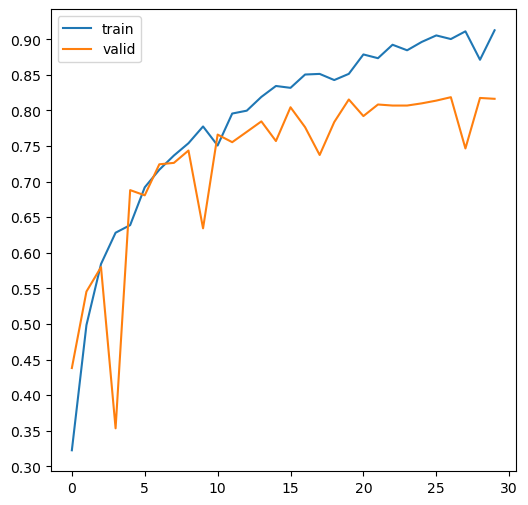

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

def show_history(history):
    plt.figure(figsize=(6, 6))
    plt.yticks(np.arange(0, 1, 0.05))
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='valid')
    plt.legend()
    
show_history(history)

# 테스트 데이터로 성능 평가
model.evaluate(test_images, test_labels)

### model.predict()를 통해 이미지 분류 예측
* 4차원 이미지 배열을 입력해서 모델학습함. predict()시에도 4차원 이미지 배열을 입력해야함. 
* 학습 데이터의 원-핫 인코딩 적용 여부와 관계없이 softmax 적용 결과는 무조건 2차원 임에 유의  

In [18]:
# 아래 코드는 오류 발생. Conv2D를 사용한 모델에 4차원 이미지 배열을 입력해서 모델을 학습했으므로 predict()시에도 테스트용 4차원 이미지 배열을 입력해야 함.  
preds = model.predict(test_images[0])#test_images[0]은 3차원이라 4차원으로 만들어줘야한다. [32,32,3]-> [1,32,32,3]

ValueError: in user code:

    File "/opt/conda/lib/python3.10/site-packages/keras/engine/training.py", line 2169, in predict_function  *
        return step_function(self, iterator)
    File "/opt/conda/lib/python3.10/site-packages/keras/engine/training.py", line 2155, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/opt/conda/lib/python3.10/site-packages/keras/engine/training.py", line 2143, in run_step  **
        outputs = model.predict_step(data)
    File "/opt/conda/lib/python3.10/site-packages/keras/engine/training.py", line 2111, in predict_step
        return self(x, training=False)
    File "/opt/conda/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/opt/conda/lib/python3.10/site-packages/keras/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "model_1" is incompatible with the layer: expected shape=(None, 32, 32, 3), found shape=(32, 32, 3)


In [31]:
# 테스트용 4차원 이미지 배열을 입력해서 predict()수행. 
# predict()의 결과는 softmax 적용 결과임. 학습 데이터의 원-핫 인코딩 적용 여부와 관계없이 softmax 적용 결과는 무조건 2차원 임에 유의 
preds = model.predict(np.expand_dims(test_images[0], axis=0))
print('예측 결과 shape:', preds.shape)
print('예측 결과:', preds)
#softmax는 2차원을 출력한다. 따라서 2차원 배열(확률값)이 나온다. argmax를 통해서 확률이 최대인 놈을 구해야한다.

1/1 [==============================] - 0s 22ms/step
예측 결과 shape: (1, 10)
예측 결과: [[1.3776623e-06 5.9112349e-06 2.5865793e-05 9.0356469e-01 3.6973488e-05
  9.3639955e-02 1.9280080e-03 2.6017585e-04 5.3475756e-04 2.2535376e-06]]


In [32]:
preds = model.predict(test_images[:32], batch_size=32)
print('예측 결과 shape:', preds.shape)
print('예측 결과:', preds)

1/1 [==============================] - 0s 18ms/step
예측 결과 shape: (32, 10)
예측 결과: [[1.37766233e-06 5.91123489e-06 2.58657928e-05 9.03564692e-01
  3.69734880e-05 9.36399549e-02 1.92800723e-03 2.60175846e-04
  5.34757797e-04 2.25353756e-06]
 [1.68287129e-09 1.81055020e-06 1.34127318e-15 1.40195862e-14
  2.73975189e-16 4.58436962e-17 3.59921294e-13 4.82918431e-17
  9.99998212e-01 3.48139295e-08]
 [5.68936121e-05 2.77018844e-05 2.88315647e-07 2.40579334e-06
  4.31561489e-08 7.82208431e-08 1.02506057e-07 1.75533023e-06
  9.99727070e-01 1.83617711e-04]
 [9.47358787e-01 1.16465497e-03 5.03146748e-06 4.13785892e-05
  5.50386494e-06 6.08499349e-08 2.48594938e-06 4.11333900e-07
  5.06306626e-02 7.90940772e-04]
 [2.11765619e-10 2.24674812e-09 9.26756125e-04 6.28802576e-04
  4.77029709e-04 2.58797641e-08 9.97967184e-01 2.48376514e-10
  3.74281184e-09 1.53258355e-07]
 [1.25002214e-06 5.94893152e-07 8.45884904e-04 2.49434579e-02
  1.24960148e-03 2.01323605e-03 9.70743597e-01 3.91956110e-06
  1.519982

In [33]:
predicted_class = np.argmax(preds, axis=1)
print('예측 클래스 값:', predicted_class)

예측 클래스 값: [3 8 8 0 6 6 1 3 3 1 0 9 4 7 9 8 5 7 8 6 7 0 4 9 4 3 4 0 9 6 6 5]


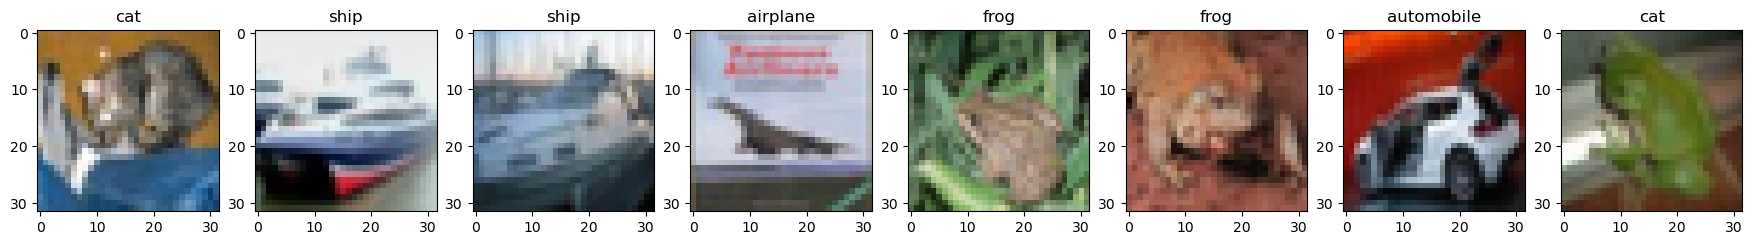

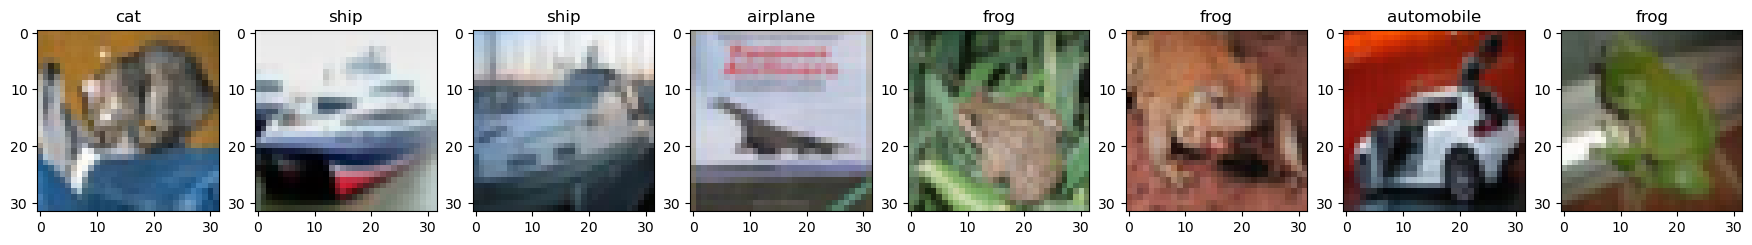

In [34]:
show_images(test_images[:8], predicted_class[:8], ncols=8)
show_images(test_images[:8], test_labels[:8], ncols=8)

### 평균이 1 이고 표준편차가 1인 표준 정규분포에서 난수 추출
* 표준 편차가 클 수록 개별 값의 크기가 일반적으로 커짐.

In [5]:
import numpy as np
numbers = np.random.normal(loc=0.0,scale=1,size=[100, 100])#loc : 평균, scale : 표준편차, size로 2차원 행렬을 만들었다. 
print(numbers)
print(numbers.mean())
print(numbers.std())
print(numbers.sum())

[[-0.18929803 -0.08319645  1.54453124 ... -0.16160916 -0.94280314
   0.3820432 ]
 [-1.4886153   0.39840518  1.24529186 ... -2.54233933  1.00254171
   0.61306899]
 [ 0.42635541 -0.98095286 -0.27470968 ... -0.17470178  0.3086397
  -0.01942747]
 ...
 [-2.80193476  0.27317111  0.94551748 ... -1.63100734  0.19374079
   0.07736235]
 [-1.0621649  -1.43194969 -0.24223284 ... -1.09870576  0.70761902
   0.18863555]
 [ 0.13458207 -1.34266216  1.19080236 ...  0.14077476  0.3096765
  -3.16414386]]
0.01669911490711878
0.9908997896659861
166.9911490711878


### Xavier initialization - 정규분포(glorot_normal), 균일분포(glorot_uniform) 

In [6]:
# glorot_normal
fan_in = 20
fan_out = 15
scale_value = np.sqrt(2/(fan_in + fan_out))
print('scale:', scale_value)
weights = np.random.normal(loc=0.0, scale=scale_value, size=(100, 100))
print(weights)
print('weights mean:',weights.mean(), 'std:', weights.std(), 'sum:', weights.sum())

scale: 0.23904572186687872
[[ 0.31964493 -0.29121085 -0.03771934 ...  0.26115939 -0.11329158
   0.28955784]
 [-0.33227417  0.19610965  0.31750901 ...  0.25203216  0.13315476
  -0.32681103]
 [ 0.19456902  0.27287618  0.31182743 ... -0.14843594 -0.23431707
   0.24812204]
 ...
 [-0.05341897  0.10731914 -0.10167474 ...  0.11327313  0.17377159
  -0.31784523]
 [ 0.0447543   0.23427909  0.37681739 ...  0.11618645 -0.24277718
  -0.13142326]
 [-0.3844287   0.09874923  0.10680128 ... -0.23927575  0.12403128
   0.0488147 ]]
weights mean: 0.002546185137028075 std: 0.23747720165892308 sum: 25.461851370280748


In [7]:
# glorot_uniform
fan_in = 10
fan_out = 8
limit = np.sqrt(6/(fan_in + fan_out))
print('limit:', limit)
weights = np.random.uniform(-1*limit, limit, size=(100, 100))
print(weights)
print('weights mean:',weights.mean(), 'std:', weights.std(), 'sum:', weights.sum())

limit: 0.5773502691896257
[[ 0.06080758 -0.35225993  0.44041525 ... -0.15431726  0.12729454
   0.17346637]
 [-0.10855777 -0.20621929  0.25565718 ...  0.23953303 -0.54942876
  -0.29359569]
 [-0.15017824  0.11209557  0.19012026 ...  0.5452527   0.18326274
   0.41226495]
 ...
 [ 0.02061844  0.25520385 -0.51650617 ...  0.14648828 -0.53297215
   0.29273118]
 [-0.3918464   0.36958365 -0.02920437 ... -0.00464619 -0.30215317
  -0.33421143]
 [ 0.51050038 -0.11545668 -0.09916144 ... -0.27544732  0.4748259
   0.45208463]]
weights mean: -0.002282547733233437 std: 0.33468409312630704 sum: -22.82547733233437


### He initialization - 정규분포(he_normal), 균일분포(he_uniform) 

In [8]:
fan_in = 10
fan_out = 8
scale_value = np.sqrt(2/(fan_in))
print('scale:', scale_value)
weights = np.random.normal(loc=0.0, scale=scale_value, size=(100, 100))
print(weights)
print('weights mean:',weights.mean(), 'std:', weights.std(), 'sum:', weights.sum())

scale: 0.4472135954999579
[[ 0.20321564 -0.48445468  0.48050993 ...  0.23496304 -0.15936457
  -0.31367038]
 [-0.23278587  0.17794598  0.51060581 ...  0.01935403  0.07030096
  -0.28509449]
 [-0.52229931  0.16775329  0.27656565 ... -0.73008638  0.15516762
  -0.00788766]
 ...
 [ 0.19122991  0.32418614 -0.00847043 ... -0.12743982 -0.34491461
  -0.24910402]
 [-0.27784009 -0.26266614 -0.78489867 ... -0.22171344 -0.52954866
   0.22738314]
 [ 0.08641949  0.24031553  0.2641887  ...  0.16352499  0.28298238
   0.53368522]]
weights mean: -0.0006001515826702481 std: 0.45172773714361436 sum: -6.001515826702482


In [9]:
fan_in = 10
fan_out = 8
limit = np.sqrt(6/(fan_in))
print('limit:', limit)
weights = np.random.uniform(-1*limit, limit, size=(100, 100))
print(weights)
print('weights mean:',weights.mean(), 'std:', weights.std(), 'sum:', weights.sum())

limit: 0.7745966692414834
[[-0.35745142 -0.07776169  0.59946879 ...  0.51274028  0.4538477
   0.72337935]
 [-0.5362113   0.55398799 -0.67562413 ...  0.59836218  0.3950396
   0.22286501]
 [ 0.56256816 -0.44332612  0.41926587 ...  0.73540727  0.49916095
  -0.15665753]
 ...
 [ 0.57839147  0.71587189 -0.4460103  ...  0.31973506  0.52120277
   0.34028972]
 [ 0.47189678 -0.36023612 -0.62318225 ... -0.19723833  0.56036417
  -0.63258036]
 [ 0.60569936  0.29275789 -0.59622159 ...  0.25786078  0.74190693
  -0.6947942 ]]
weights mean: 0.00887058855527545 std: 0.44437550707417656 sum: 88.7058855527545


### weight 초기화를 He Normal로 변경 후 성능 검증
* Keras Conv2D의 기본 weight 초기화는 glorot_uniform임. 이를 he_normal로 변경 후 동일 모델로 성능 테스트 
* label은 원-핫 인코딩을 적용 

In [3]:
import numpy as np
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical


def get_preprocessed_data(images, labels):
    
    # 학습과 테스트 이미지 array를 0~1 사이값으로 scale 및 float32 형 변형. 
    images = np.array(images/255.0, dtype=np.float32)
    labels = np.array(labels, dtype=np.float32)
    labels = labels.squeeze()
    
    return images, labels

# 0 ~ 1사이값 float32로 변경하는 함수 호출 한 뒤 OHE 적용 
def get_preprocessed_ohe(images, labels):
    images, labels = get_preprocessed_data(images, labels)
    # OHE 적용 
    oh_labels = to_categorical(labels)
    return images, oh_labels

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

train_images, train_oh_labels = get_preprocessed_ohe(train_images, train_labels)
test_images, test_oh_labels = get_preprocessed_ohe(test_images, test_labels)
print(train_images.shape, train_oh_labels.shape, test_images.shape, test_oh_labels.shape)

(50000, 32, 32, 3) (50000, 10) (10000, 32, 32, 3) (10000, 10)


In [4]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam , RMSprop 
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau , EarlyStopping , ModelCheckpoint , LearningRateScheduler

input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

#x = Conv2D(filters=32, kernel_size=(5, 5), padding='valid', activation='relu')(input_tensor)
x = Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', kernel_initializer='he_normal')(input_tensor)
x = Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', kernel_initializer='he_normal')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(filters=64, kernel_size=3, padding='same', activation='relu', kernel_initializer='he_normal')(x)
x = Conv2D(filters=64, kernel_size=3, padding='same', kernel_initializer='he_normal')(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=2)(x)

x = Conv2D(filters=128, kernel_size=3, padding='same', activation='relu', kernel_initializer='he_normal')(x)
x = Conv2D(filters=128, kernel_size=3, padding='same', activation='relu', kernel_initializer='he_normal')(x)
x = MaxPooling2D(pool_size=2)(x)

# cifar10의 클래스가 10개 이므로 마지막 classification의 Dense layer units갯수는 10
x = Flatten(name='flatten')(x)
x = Dropout(rate=0.5)(x)
x = Dense(300, activation='relu', name='fc1')(x)
x = Dropout(rate=0.3)(x)
output = Dense(10, activation='softmax', name='output')(x)

model = Model(inputs=input_tensor, outputs=output)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                             

In [6]:
# optimizer는 Adam으로 설정하고, label값이 원-핫 인코딩이므로 loss는 categorical_crossentropy 임. 
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x=train_images, y=train_oh_labels, batch_size=256, epochs=30, validation_split=0.15 )

Epoch 1/30
167/167 [==============================] - 6s 19ms/step - loss: 1.7428 - accuracy: 0.3566 - val_loss: 1.4604 - val_accuracy: 0.4657
Epoch 2/30
167/167 [==============================] - 3s 15ms/step - loss: 1.3030 - accuracy: 0.5283 - val_loss: 1.5373 - val_accuracy: 0.4931
Epoch 3/30
167/167 [==============================] - 2s 15ms/step - loss: 1.1247 - accuracy: 0.5986 - val_loss: 1.4700 - val_accuracy: 0.5219
Epoch 4/30
167/167 [==============================] - 2s 14ms/step - loss: 1.0343 - accuracy: 0.6347 - val_loss: 0.9713 - val_accuracy: 0.6579
Epoch 5/30
167/167 [==============================] - 2s 15ms/step - loss: 0.9073 - accuracy: 0.6780 - val_loss: 1.0830 - val_accuracy: 0.6304
Epoch 6/30
167/167 [==============================] - 2s 14ms/step - loss: 0.8284 - accuracy: 0.7104 - val_loss: 0.8160 - val_accuracy: 0.7173
Epoch 7/30
167/167 [==============================] - 2s 14ms/step - loss: 0.7305 - accuracy: 0.7437 - val_loss: 0.7360 - val_accuracy: 0.7403

313/313 [==============================] - 1s 3ms/step - loss: 0.7189 - accuracy: 0.7921


[0.7189311385154724, 0.7921000123023987]

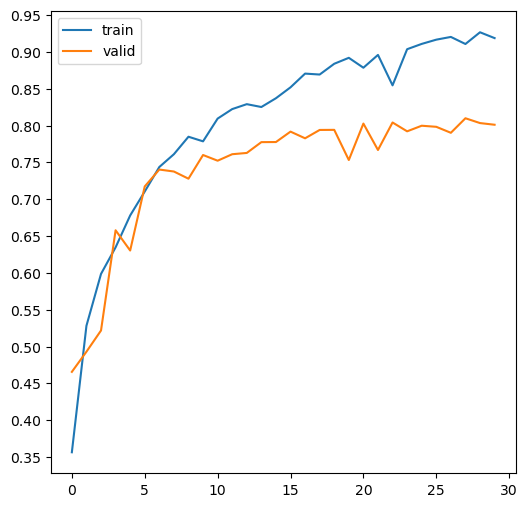

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

def show_history(history):
    plt.figure(figsize=(6, 6))
    plt.yticks(np.arange(0, 1, 0.05))
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='valid')
    plt.legend()
show_history(history)

# 테스트 데이터로 성능 평가
model.evaluate(test_images, test_oh_labels)

### Batch Normalization을 모델에 적용 후 성능 검증

In [9]:
import tensorflow as tf
import numpy as np
import random as python_random

np.random.seed(2021)
python_random.seed(2021)
tf.random.set_seed(2021)

In [10]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam , RMSprop 
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau , EarlyStopping , ModelCheckpoint , LearningRateScheduler

input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

#x = Conv2D(filters=32, kernel_size=(5, 5), padding='valid', activation='relu')(input_tensor)
x = Conv2D(filters=32, kernel_size=(3, 3), padding='same')(input_tensor)
x = BatchNormalization()(x)#BN은 layer를 따로 추가해야한다. 그리고 BN은 순서가 CNN-> BN -> Activation 순서이기 때문에 CNN코드 안에 activation을 넣으면 안된다.
x = Activation('relu')(x)

x = Conv2D(filters=32, kernel_size=(3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(filters=64, kernel_size=3, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=64, kernel_size=3, padding='same')(x)
x = Activation('relu')(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=2)(x)

x = Conv2D(filters=128, kernel_size=3, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=128, kernel_size=3, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=2)(x)

# cifar10의 클래스가 10개 이므로 마지막 classification의 Dense layer units갯수는 10
x = Flatten(name='flatten')(x)
x = Dropout(rate=0.5)(x)
x = Dense(300, activation='relu', name='fc1')(x)
x = Dropout(rate=0.3)(x)
output = Dense(10, activation='softmax', name='output')(x)

model = Model(inputs=input_tensor, outputs=output)

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 activation_1 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                           

In [12]:
# label값이 원-핫 인코딩이 아니므로 loss는 categorical_crossentropy 임. 
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x=train_images, y=train_oh_labels, batch_size=256, epochs=30, validation_split=0.15)

Epoch 1/30
167/167 [==============================] - 8s 22ms/step - loss: 0.9471 - accuracy: 0.6611 - val_loss: 1.0629 - val_accuracy: 0.6239
Epoch 2/30
167/167 [==============================] - 3s 19ms/step - loss: 0.8268 - accuracy: 0.7070 - val_loss: 1.0292 - val_accuracy: 0.6396
Epoch 3/30
167/167 [==============================] - 3s 21ms/step - loss: 0.7813 - accuracy: 0.7254 - val_loss: 1.0920 - val_accuracy: 0.6407
Epoch 4/30
167/167 [==============================] - 3s 19ms/step - loss: 0.6912 - accuracy: 0.7580 - val_loss: 0.7242 - val_accuracy: 0.7395
Epoch 5/30
167/167 [==============================] - 3s 19ms/step - loss: 0.6393 - accuracy: 0.7781 - val_loss: 0.7849 - val_accuracy: 0.7312
Epoch 6/30
167/167 [==============================] - 3s 19ms/step - loss: 0.6138 - accuracy: 0.7836 - val_loss: 0.7145 - val_accuracy: 0.7480
Epoch 7/30
167/167 [==============================] - 3s 19ms/step - loss: 0.5581 - accuracy: 0.8031 - val_loss: 0.8506 - val_accuracy: 0.7161

In [13]:
model.evaluate(test_images, test_oh_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.8504 - accuracy: 0.8000


[0.8503849506378174, 0.800000011920929]

### He Normal 적용 후 Batch Normalization

In [14]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam , RMSprop 
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau , EarlyStopping , ModelCheckpoint , LearningRateScheduler

input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

#x = Conv2D(filters=32, kernel_size=(5, 5), padding='valid', activation='relu')(input_tensor)
x = Conv2D(filters=32, kernel_size=(3, 3), padding='same', kernel_initializer='he_normal')(input_tensor)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=32, kernel_size=(3, 3), padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(filters=64, kernel_size=3, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=64, kernel_size=3, padding='same', kernel_initializer='he_normal')(x)
x = Activation('relu')(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=2)(x)

x = Conv2D(filters=128, kernel_size=3, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=128, kernel_size=3, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=2)(x)

# cifar10의 클래스가 10개 이므로 마지막 classification의 Dense layer units갯수는 10
x = Flatten(name='flatten')(x)
x = Dropout(rate=0.5)(x)
x = Dense(300, activation='relu', name='fc1')(x)
x = Dropout(rate=0.3)(x)
output = Dense(10, activation='softmax', name='output')(x)

model = Model(inputs=input_tensor, outputs=output)

model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_5 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 activation_8 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_6 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                           

In [15]:
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x=train_images, y=train_oh_labels, batch_size=256, epochs=30, validation_split=0.15)

Epoch 1/30
167/167 [==============================] - 8s 21ms/step - loss: 1.8050 - accuracy: 0.3619 - val_loss: 3.0032 - val_accuracy: 0.1433
Epoch 2/30
167/167 [==============================] - 3s 18ms/step - loss: 1.3472 - accuracy: 0.5103 - val_loss: 1.3678 - val_accuracy: 0.4751
Epoch 3/30
167/167 [==============================] - 3s 20ms/step - loss: 1.1359 - accuracy: 0.5934 - val_loss: 1.8918 - val_accuracy: 0.4317
Epoch 4/30
167/167 [==============================] - 3s 18ms/step - loss: 0.9866 - accuracy: 0.6506 - val_loss: 1.2242 - val_accuracy: 0.5827
Epoch 5/30
167/167 [==============================] - 3s 18ms/step - loss: 0.8784 - accuracy: 0.6893 - val_loss: 0.9210 - val_accuracy: 0.6667
Epoch 6/30
167/167 [==============================] - 3s 19ms/step - loss: 0.8276 - accuracy: 0.7109 - val_loss: 0.9248 - val_accuracy: 0.6905
Epoch 7/30
167/167 [==============================] - 3s 18ms/step - loss: 0.7325 - accuracy: 0.7425 - val_loss: 0.8496 - val_accuracy: 0.7009

In [16]:
model.evaluate(test_images, test_oh_labels, batch_size=64)

157/157 [==============================] - 1s 4ms/step - loss: 0.7301 - accuracy: 0.8021


[0.7300926446914673, 0.8021000027656555]

In [17]:
preds = model.predict(np.expand_dims(test_images[0], axis=0))
predicted_class = np.argmax(preds, axis=1)
print('예측 클래스 값:', predicted_class)

1/1 [==============================] - 0s 248ms/step
예측 클래스 값: [5]


### 학습 시 데이터를 섞는 shuffle 적용 유무에 따른  성능 테스트

shuffle로 가져온 데이터를 섞는다. 예를 들어, 1~50000까지 들어오면 shuffle로 섞어서 3, 4000, 29999... 이런식

In [10]:
import tensorflow as tf
import numpy as np
import random as python_random
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# seed 를 설정해서 학습시마다 동일한 결과 유도. 불행히도 의도한 대로 동작하지 않음. 
def set_random_seed(seed_value):
    np.random.seed(seed_value)
    python_random.seed(seed_value)
    tf.random.set_seed(seed_value)

# 0 ~ 1사이값의 float32로 변경하는 함수
def get_preprocessed_data(images, labels):
    
    # 학습과 테스트 이미지 array를 0~1 사이값으로 scale 및 float32 형 변형. 
    images = np.array(images/255.0, dtype=np.float32)
    labels = np.array(labels, dtype=np.float32)
    
    return images, labels

# 0 ~ 1사이값 float32로 변경하는 함수 호출 한 뒤 OHE 적용 
def get_preprocessed_ohe(images, labels):
    images, labels = get_preprocessed_data(images, labels)
    # OHE 적용 
    oh_labels = to_categorical(labels)
    return images, oh_labels

# 학습/검증/테스트 데이터 세트에 전처리 및 OHE 적용한 뒤 반환 
def get_train_valid_test_set(train_images, train_labels, test_images, test_labels, valid_size=0.15, random_state=2021):
    # 학습 및 테스트 데이터 세트를  0 ~ 1사이값 float32로 변경 및 OHE 적용. 
    train_images, train_oh_labels = get_preprocessed_ohe(train_images, train_labels)
    test_images, test_oh_labels = get_preprocessed_ohe(test_images, test_labels)
    
    # 학습 데이터를 검증 데이터 세트로 다시 분리
    tr_images, val_images, tr_oh_labels, val_oh_labels = train_test_split(train_images, train_oh_labels, test_size=valid_size, random_state=random_state)
    
    return (tr_images, tr_oh_labels), (val_images, val_oh_labels), (test_images, test_oh_labels ) 

In [11]:
from tensorflow.keras.datasets import cifar10

# random seed는 2021로 고정.
set_random_seed(2021)
# CIFAR10 데이터 재 로딩 및 Scaling/OHE 전처리 적용하여 학습/검증/데이터 세트 생성. 
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
print(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)
(tr_images, tr_oh_labels), (val_images, val_oh_labels), (test_images, test_oh_labels) = \
    get_train_valid_test_set(train_images, train_labels, test_images, test_labels, valid_size=0.15, random_state=2021)

print(tr_images.shape, tr_oh_labels.shape, val_images.shape, val_oh_labels.shape, test_images.shape, test_oh_labels.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)
(42500, 32, 32, 3) (42500, 10) (7500, 32, 32, 3) (7500, 10) (10000, 32, 32, 3) (10000, 10)


### model 생성을 위한 별도 함수 생성

In [13]:
IMAGE_SIZE = 32

In [14]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam , RMSprop 
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau , EarlyStopping , ModelCheckpoint , LearningRateScheduler

def create_model():
    input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

    #x = Conv2D(filters=32, kernel_size=(5, 5), padding='valid', activation='relu')(input_tensor)
    x = Conv2D(filters=32, kernel_size=(3, 3), padding='same')(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(filters=32, kernel_size=(3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    x = Conv2D(filters=64, kernel_size=3, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(filters=64, kernel_size=3, padding='same')(x)
    x = Activation('relu')(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=2)(x)

    x = Conv2D(filters=128, kernel_size=3, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(filters=128, kernel_size=3, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=2)(x)

    # cifar10의 클래스가 10개 이므로 마지막 classification의 Dense layer units갯수는 10
    x = Flatten(name='flatten')(x)
    x = Dropout(rate=0.5)(x)
    x = Dense(300, activation='relu', name='fc1')(x)
    x = Dropout(rate=0.3)(x)
    output = Dense(10, activation='softmax', name='output')(x)

    model = Model(inputs=input_tensor, outputs=output)
    #model.summary()
    
    return model


### shuffle을 False/True 변경하면서 테스트 

In [15]:
model = create_model()
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
# 먼저 shuffle을 false로 테스트 
noshuffle_history = model.fit(x=tr_images, y=tr_oh_labels, batch_size=64, epochs=30, shuffle=False, 
                    validation_data=(val_images, val_oh_labels))
evaluation_result = model.evaluate(test_images, test_oh_labels, batch_size=64)
print('#### 테스트 세트로 evaluation 결과 :', evaluation_result)

# model이 반복적으로 메모리 차지하는것을 없애기 위해서 수행. 
tf.keras.backend.clear_session()

Epoch 1/30
665/665 [==============================] - 18s 10ms/step - loss: 1.5955 - accuracy: 0.4277 - val_loss: 1.3754 - val_accuracy: 0.5096
Epoch 2/30
665/665 [==============================] - 5s 8ms/step - loss: 1.1185 - accuracy: 0.6014 - val_loss: 1.0965 - val_accuracy: 0.6147
Epoch 3/30
665/665 [==============================] - 6s 8ms/step - loss: 0.9156 - accuracy: 0.6796 - val_loss: 1.0037 - val_accuracy: 0.6527
Epoch 4/30
665/665 [==============================] - 5s 8ms/step - loss: 0.8034 - accuracy: 0.7208 - val_loss: 1.3340 - val_accuracy: 0.5756
Epoch 5/30
665/665 [==============================] - 5s 8ms/step - loss: 0.7178 - accuracy: 0.7508 - val_loss: 0.8287 - val_accuracy: 0.7119
Epoch 6/30
665/665 [==============================] - 6s 8ms/step - loss: 0.6457 - accuracy: 0.7742 - val_loss: 0.8007 - val_accuracy: 0.7251
Epoch 7/30
665/665 [==============================] - 6s 9ms/step - loss: 0.5905 - accuracy: 0.7968 - val_loss: 0.7753 - val_accuracy: 0.7408
Epoc

### shuffle을 True로 변경하고 학습 및 테스트

In [16]:
model = create_model()
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
# shuffle을 True로 변경하여 학습 및 테스트
shuffle_history = model.fit(x=tr_images, y=tr_oh_labels, batch_size=64, epochs=30, shuffle=True, 
                    validation_data=(val_images, val_oh_labels))
evaluation_result = model.evaluate(test_images, test_oh_labels, batch_size=64)
print('#### 테스트 세트로 evaluation 결과 :', evaluation_result)

tf.keras.backend.clear_session()

Epoch 1/30
665/665 [==============================] - 10s 9ms/step - loss: 1.5832 - accuracy: 0.4299 - val_loss: 1.2806 - val_accuracy: 0.5316
Epoch 2/30
665/665 [==============================] - 6s 9ms/step - loss: 1.1226 - accuracy: 0.5970 - val_loss: 1.0721 - val_accuracy: 0.6080
Epoch 3/30
665/665 [==============================] - 6s 9ms/step - loss: 0.9298 - accuracy: 0.6700 - val_loss: 0.9684 - val_accuracy: 0.6643
Epoch 4/30
665/665 [==============================] - 6s 8ms/step - loss: 0.8104 - accuracy: 0.7139 - val_loss: 1.3649 - val_accuracy: 0.5457
Epoch 5/30
665/665 [==============================] - 6s 8ms/step - loss: 0.7321 - accuracy: 0.7459 - val_loss: 0.7564 - val_accuracy: 0.7369
Epoch 6/30
665/665 [==============================] - 6s 9ms/step - loss: 0.6640 - accuracy: 0.7694 - val_loss: 1.0408 - val_accuracy: 0.6693
Epoch 7/30
665/665 [==============================] - 5s 8ms/step - loss: 0.6097 - accuracy: 0.7880 - val_loss: 0.6413 - val_accuracy: 0.7845
Epoch

### 위에서 수행한 Shuffle테스트 시 validation 데이터 기반 성능 검증 시각화 

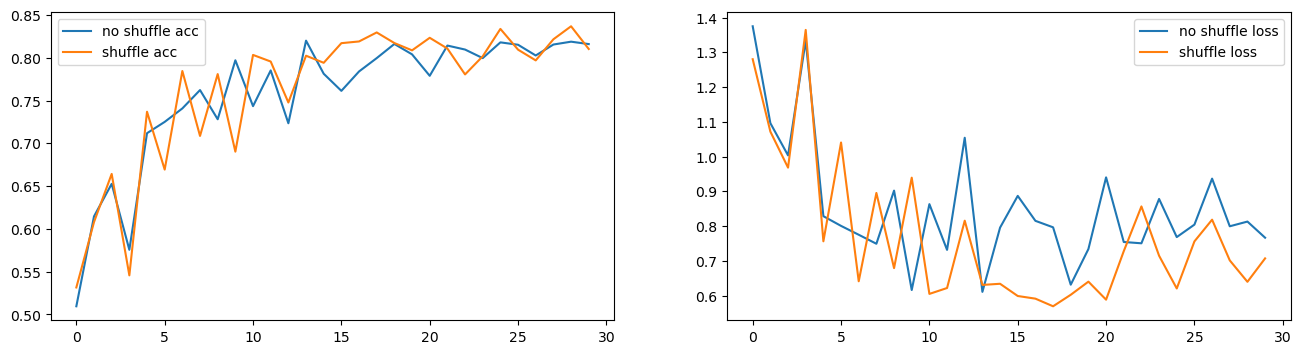

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

def show_history_shuffle(noshuffle_history, shuffle_history):
    figure, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))
    # shuffle과 no shuffle의 validation accuracy 비교 
    axs[0].plot(noshuffle_history.history['val_accuracy'], label='no shuffle acc')
    axs[0].plot(shuffle_history.history['val_accuracy'], label='shuffle acc')
    # shuffle과 no shuffle의 validation loss 비교 
    axs[1].plot(noshuffle_history.history['val_loss'], label='no shuffle loss')
    axs[1].plot(shuffle_history.history['val_loss'], label='shuffle loss')
    axs[0].legend()
    axs[1].legend()

show_history_shuffle(noshuffle_history, shuffle_history)


### batch 크기를 32, 64, 256, 512로 변경하면서 테스트

In [18]:
b_sizes = [32, 64, 256, 512]
histories = []
evaluations = []
for b_size in b_sizes:
    model = create_model()
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    # batch_size를 순차적으로 32, 64, 256, 512로 변경하여 학습 및 evaluation 수행. 
    print('##### batch size :', b_size, '학습 #####')
    history = model.fit(x=tr_images, y=tr_oh_labels, batch_size=b_size, epochs=30, 
                        shuffle=True, validation_data=(val_images, val_oh_labels))
    # batch size별 학습 history 결과 저장. 
    histories.append(history)
    # 테스트 세트로 evaluation 수행하고 batch size별 결과 저장. 
    evaluation_result = model.evaluate(test_images, test_oh_labels, batch_size=b_size)
    print('#### 테스트 세트로 evaluation 결과 :', evaluation_result)
    evaluations.append(evaluation_result)
    
    tf.keras.backend.clear_session()

##### batch size : 32 학습 #####
Epoch 1/30
1329/1329 [==============================] - 15s 8ms/step - loss: 1.5693 - accuracy: 0.4299 - val_loss: 1.2159 - val_accuracy: 0.5552
Epoch 2/30
1329/1329 [==============================] - 11s 8ms/step - loss: 1.1193 - accuracy: 0.6002 - val_loss: 0.9878 - val_accuracy: 0.6601
Epoch 3/30
1329/1329 [==============================] - 10s 7ms/step - loss: 0.9286 - accuracy: 0.6738 - val_loss: 1.2084 - val_accuracy: 0.6189
Epoch 4/30
1329/1329 [==============================] - 10s 8ms/step - loss: 0.8156 - accuracy: 0.7202 - val_loss: 0.7825 - val_accuracy: 0.7319
Epoch 5/30
1329/1329 [==============================] - 11s 8ms/step - loss: 0.7211 - accuracy: 0.7512 - val_loss: 0.8135 - val_accuracy: 0.7220
Epoch 6/30
1329/1329 [==============================] - 10s 7ms/step - loss: 0.6502 - accuracy: 0.7767 - val_loss: 0.7351 - val_accuracy: 0.7519
Epoch 7/30
1329/1329 [==============================] - 10s 8ms/step - loss: 0.5951 - accuracy: 0.7

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

def show_history_batch(histories):
    figure, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))  
    # batch 크기별 validation accuracy 비교 
    axs[0].plot(histories[0].history['val_accuracy'], label='batch 32 acc')
    axs[0].plot(histories[1].history['val_accuracy'], label='batch 64 acc')
    axs[0].plot(histories[2].history['val_accuracy'], label='batch 256 acc')
    axs[0].plot(histories[3].history['val_accuracy'], label='batch 512 acc')
    
    # batch 크기별 validation loss 비교
    axs[1].plot(histories[0].history['val_loss'], label='batch 32 loss')
    axs[1].plot(histories[1].history['val_loss'], label='batch 64 loss')
    axs[1].plot(histories[2].history['val_loss'], label='batch 256 loss')
    axs[1].plot(histories[3].history['val_loss'], label='batch 512 loss')
    
    axs[0].legend()
    axs[1].legend()

show_history_batch(histories)